# [Model] Data Analytics Test - iFood
###### [By Israel Mendes](https://github.com/israelmendez232)

This notebook were generated locally, because of the complexity to run the models that won't work for the [Databricks](https://databricks.com/) Community Edition.

The main library used here is [PyCaret](https://pycaret.readthedocs.io/en/latest/) to generate the model and tuning, because is very pratical and productive. The summary:
1. Train the model and explorations;
2. Validate the results and save the model;
3. Avaluate the return;
4. [EXTRA] Results

## 1. Train the model
Bring more explorations.

In [1]:
import pandas as pd
from pycaret.classification import *

df = pd.read_csv("../data/data_analytics_cleaned.csv") 

df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [2]:
# Selecting only the best variables estipulated on the 02-EDA phase.
df_focused = df[["ID", "AcceptedCmp5", "AcceptedCmp1", "MntWines", "AcceptedCmp3", "MntMeatProducts", "NumCatalogPurchases", "Recency", "Teenhome", "Kidhome", "Response"]]
df_focused.head()

,ID,AcceptedCmp5,AcceptedCmp1,MntWines,AcceptedCmp3,MntMeatProducts,NumCatalogPurchases,Recency,Teenhome,Kidhome,Response
0,5524,0,0,635,0,546,10,58,0,0,1
1,2174,0,0,11,0,6,1,38,1,1,0
2,4141,0,0,426,0,127,2,26,0,0,0
3,6182,0,0,11,0,20,0,26,0,1,0
4,5324,0,0,173,0,118,3,94,0,1,0


In [3]:
df_focused.describe()

,ID,AcceptedCmp5,AcceptedCmp1,MntWines,AcceptedCmp3,MntMeatProducts,NumCatalogPurchases,Recency,Teenhome,Kidhome,Response
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,5586.899232,0.072752,0.064166,305.153638,0.073656,166.962494,2.671487,49.007682,0.505648,0.441934,0.150474
std,3247.819194,0.259788,0.245104,337.305490,0.261269,224.226178,2.927096,28.941864,0.544236,0.536965,0.357617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2815.000000,0.000000,0.000000,24.000000,0.000000,16.000000,0.000000,24.000000,0.000000,0.000000,0.000000
50%,5455.000000,0.000000,0.000000,175.000000,0.000000,68.000000,2.000000,49.000000,0.000000,0.000000,0.000000
75%,8420.000000,0.000000,0.000000,505.000000,0.000000,232.000000,4.000000,74.000000,1.000000,1.000000,0.000000
max,11191.000000,1.000000,1.000000,1493.000000,1.000000,1725.000000,28.000000,99.000000,2.000000,2.000000,1.000000


In [4]:
# Defining the rows for testing and prediction
df_train = df_focused.sample(frac = 0.9, random_state = 786)
df_prediction = df_focused.drop(df_train.index)

df_train.reset_index(drop = True, inplace = True)
df_prediction.reset_index(drop = True, inplace = True)

print('Data for Training/Modeling: ' + str(df_train.shape))
print('Data For Predictions: ' + str(df_prediction.shape))

Data for Training/Modeling: (1992, 11)
Data For Predictions: (221, 11)


In [5]:
# Setup for the classification model
setup_sample = setup(df_train, target = 'Response')

,Description,Value
0,session_id,3108
1,Target,Response
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1992, 11)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
# Compare different models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8730,0.8357,0.6929,0.8628,0.8619,0.4482,0.4661,0.0070
et,Extra Trees Classifier,0.8730,0.8141,0.6988,0.8619,0.8633,0.4568,0.4694,0.0720
gbc,Gradient Boosting Classifier,0.8716,0.8409,0.6704,0.8593,0.8557,0.4136,0.4416,0.0550
ridge,Ridge Classifier,0.8709,0.0000,0.6459,0.8584,0.8491,0.3750,0.4188,0.0060
catboost,CatBoost Classifier,0.8702,0.8433,0.6732,0.8567,0.8555,0.4152,0.4383,1.5620
rf,Random Forest Classifier,0.8694,0.8320,0.6618,0.8543,0.8522,0.3967,0.4241,0.0790
ada,Ada Boost Classifier,0.8623,0.8161,0.6536,0.8465,0.8455,0.3722,0.3970,0.0330
lightgbm,Light Gradient Boosting Machine,0.8623,0.8324,0.6740,0.8491,0.8506,0.4047,0.4195,0.0240
lr,Logistic Regression,0.8616,0.8315,0.6351,0.8436,0.8402,0.3419,0.3758,0.2320
xgboost,Extreme Gradient Boosting,0.8594,0.8215,0.6797,0.8489,0.8496,0.4067,0.4199,0.0990


The best models are highlighted in yellow. Decided to move with CatBoost + Extra Trees and Naive Bayes.

In [7]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9071,0.7912,0.7600,0.9011,0.8997,0.5973,0.6119
1,0.8643,0.8590,0.6606,0.8466,0.8493,0.3854,0.4028
2,0.8714,0.8721,0.6464,0.8556,0.8504,0.3762,0.4137
3,0.8429,0.7975,0.6440,0.8230,0.8289,0.3348,0.3450
4,0.8777,0.9122,0.6690,0.8648,0.8601,0.4241,0.4570
5,0.8633,0.8193,0.6605,0.8456,0.8483,0.3848,0.4023
6,0.8633,0.8726,0.7158,0.8562,0.8592,0.4569,0.4586
7,0.8921,0.8403,0.6775,0.8918,0.8723,0.4672,0.5267
8,0.8849,0.9013,0.6917,0.8743,0.8703,0.4702,0.4983
9,0.8345,0.7673,0.6064,0.8079,0.8163,0.2553,0.2669


In [8]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8857,0.7987,0.7288,0.8761,0.8781,0.5147,0.5235
1,0.8500,0.8349,0.6706,0.8370,0.8419,0.3761,0.3803
2,0.8857,0.8247,0.6918,0.8751,0.8712,0.4707,0.4988
3,0.8571,0.7835,0.6700,0.8407,0.8445,0.3952,0.4073
4,0.8993,0.8856,0.7372,0.8920,0.8898,0.5565,0.5753
5,0.8777,0.8023,0.7059,0.8658,0.8679,0.4729,0.4844
6,0.8489,0.8213,0.6888,0.8409,0.8443,0.3998,0.4012
7,0.8993,0.8234,0.7372,0.8920,0.8898,0.5565,0.5753
8,0.8849,0.7955,0.7102,0.8740,0.8740,0.4932,0.5098
9,0.8417,0.7714,0.6476,0.8251,0.8312,0.3320,0.3377


In [9]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7643,0.7523,0.7122,0.8325,0.7880,0.3230,0.3446
1,0.7929,0.7658,0.7107,0.8339,0.8085,0.3502,0.3613
2,0.8071,0.8224,0.7377,0.8465,0.8217,0.3950,0.4076
3,0.7929,0.7585,0.7538,0.8475,0.8112,0.4022,0.4230
4,0.8273,0.7665,0.7314,0.8470,0.8354,0.4166,0.4211
5,0.8058,0.8057,0.7370,0.8453,0.8204,0.3940,0.4066
6,0.8345,0.8485,0.8094,0.8781,0.8485,0.4991,0.5204
7,0.7914,0.7972,0.6915,0.8251,0.8049,0.3285,0.3359
8,0.7410,0.7246,0.6247,0.7921,0.7618,0.2042,0.2118
9,0.8273,0.7902,0.7498,0.8538,0.8376,0.4353,0.4433


In [10]:
# Using Hyperparameters
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9143,0.7878,0.7643,0.9107,0.9062,0.6203,0.6411
1,0.8571,0.8536,0.6379,0.8358,0.8390,0.3384,0.3586
2,0.8786,0.8644,0.6321,0.8762,0.8508,0.3657,0.4413
3,0.8786,0.8001,0.6828,0.8675,0.8622,0.4526,0.4840
4,0.8993,0.9013,0.7003,0.8993,0.8829,0.5145,0.5658
5,0.8489,0.8205,0.6334,0.8267,0.8323,0.3201,0.3346
6,0.8705,0.8881,0.7201,0.8619,0.8651,0.4753,0.4785
7,0.8777,0.8395,0.6321,0.8754,0.8498,0.3653,0.4409
8,0.8993,0.8897,0.7003,0.8993,0.8829,0.5145,0.5658
9,0.8417,0.7747,0.6107,0.8148,0.8217,0.2716,0.2878


In [11]:
# Using Hyperparameters
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8929,0.8101,0.7331,0.8839,0.8843,0.5354,0.5484
1,0.8357,0.8344,0.6067,0.8092,0.8176,0.2560,0.2676
2,0.8714,0.8432,0.6464,0.8556,0.8504,0.3762,0.4137
3,0.8500,0.8320,0.6133,0.8250,0.8244,0.2933,0.3261
4,0.8777,0.8947,0.6690,0.8648,0.8601,0.4241,0.4570
5,0.8561,0.8314,0.6193,0.8323,0.8326,0.3064,0.3370
6,0.8633,0.8671,0.6789,0.8484,0.8524,0.4109,0.4209
7,0.8849,0.8081,0.6548,0.8838,0.8613,0.4175,0.4853
8,0.8921,0.8423,0.6775,0.8918,0.8723,0.4672,0.5267
9,0.8417,0.7747,0.5923,0.8099,0.8159,0.2370,0.2607


In [12]:
# Using Hyperparameters
tuned_nb = tune_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.6541,0.5455,0.8778,0.8032,0.1443,0.2788
1,0.8571,0.6953,0.5455,0.8778,0.8032,0.1443,0.2788
2,0.8357,0.6656,0.5327,0.7808,0.7895,0.0955,0.1284
3,0.8500,0.5849,0.5784,0.8267,0.8111,0.2230,0.2869
4,0.8417,0.7397,0.5185,0.7918,0.7820,0.0585,0.1131
5,0.8489,0.6841,0.5412,0.8235,0.7972,0.1268,0.2069
6,0.8561,0.7401,0.5639,0.8420,0.8114,0.1914,0.2791
7,0.8417,0.6892,0.5185,0.7918,0.7820,0.0585,0.1131
8,0.8633,0.6997,0.5682,0.8824,0.8165,0.2100,0.3425
9,0.8489,0.7222,0.5412,0.8235,0.7972,0.1268,0.2069


In [13]:
# Blending the models
blender = blend_models(estimator_list = [tuned_catboost, tuned_et, tuned_nb], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8929,0.8008,0.6776,0.8925,0.8732,0.4675,0.5270
1,0.8571,0.8467,0.5639,0.8430,0.8128,0.1917,0.2794
2,0.8786,0.8609,0.6321,0.8762,0.8508,0.3657,0.4413
3,0.8643,0.8194,0.6394,0.8479,0.8411,0.3606,0.4010
4,0.8705,0.8951,0.6094,0.8660,0.8376,0.3104,0.3928
5,0.8417,0.8228,0.5738,0.8052,0.8093,0.1991,0.2314
6,0.8633,0.8726,0.6235,0.8436,0.8382,0.3251,0.3665
7,0.8705,0.8279,0.6094,0.8660,0.8376,0.3104,0.3928
8,0.8993,0.8617,0.6818,0.9100,0.8786,0.4903,0.5699
9,0.8345,0.8081,0.5511,0.7884,0.7967,0.1413,0.1705


In [14]:
stacker = stack_models(estimator_list = [tuned_catboost, tuned_et, tuned_nb], meta_model = catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8857,0.7831,0.7473,0.8785,0.8810,0.5341,0.5378
1,0.8500,0.8201,0.6337,0.8279,0.8335,0.3207,0.3352
2,0.8714,0.8482,0.6649,0.8554,0.8551,0.4045,0.4287
3,0.8429,0.8008,0.6440,0.8230,0.8289,0.3348,0.3450
4,0.8921,0.8970,0.6960,0.8857,0.8765,0.4918,0.5300
5,0.8633,0.8151,0.6789,0.8484,0.8524,0.4109,0.4209
6,0.8561,0.8695,0.6746,0.8418,0.8466,0.3927,0.3994
7,0.8849,0.8162,0.6733,0.8770,0.8661,0.4451,0.4895
8,0.9137,0.8605,0.7273,0.9217,0.8996,0.5838,0.6421
9,0.8417,0.7572,0.6476,0.8251,0.8312,0.3320,0.3377


Chosing stacker over blender because of a significant better performance on stacker based on Recall, Kappa and MCC.

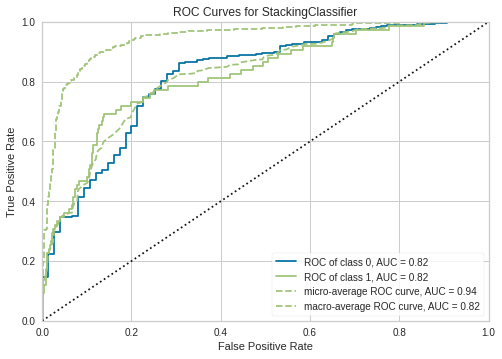

In [15]:
plot_model(stacker)

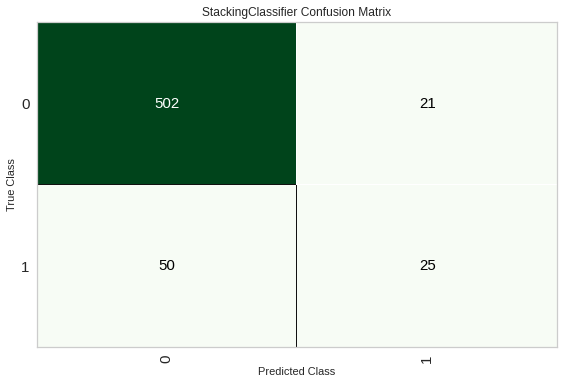

In [16]:
plot_model(stacker, plot = 'confusion_matrix')

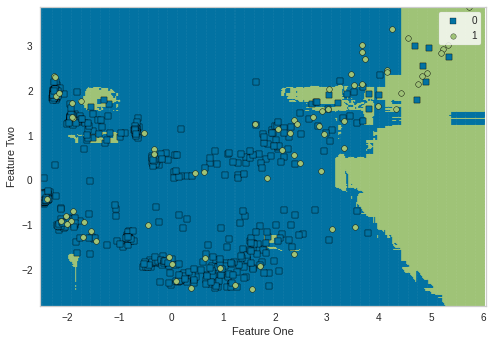

In [17]:
plot_model(stacker, plot = 'boundary')

## 2. Validate the results
Save the model

In [18]:
predict_new = predict_model(stacker, data = df_prediction)
predict_new.tail()

,ID,AcceptedCmp5,AcceptedCmp1,MntWines,AcceptedCmp3,MntMeatProducts,NumCatalogPurchases,Recency,Teenhome,Kidhome,Response,Label,Score
216,4418,0,0,671,0,655,5,36,0,0,1,0,0.8350
217,1092,0,0,269,0,495,3,17,1,0,0,0,0.9475
218,1448,0,0,21,0,12,0,33,2,1,0,0,0.9893
219,4286,0,0,580,1,58,6,24,1,0,0,0,0.7861
220,4749,0,0,368,0,68,2,55,1,1,0,0,0.9374


In [19]:
predict_new['result'] = predict_new['Response'] == predict_new['Label']
predict_new.tail()

,ID,AcceptedCmp5,AcceptedCmp1,MntWines,AcceptedCmp3,MntMeatProducts,NumCatalogPurchases,Recency,Teenhome,Kidhome,Response,Label,Score,result
216,4418,0,0,671,0,655,5,36,0,0,1,0,0.8350,False
217,1092,0,0,269,0,495,3,17,1,0,0,0,0.9475,True
218,1448,0,0,21,0,12,0,33,2,1,0,0,0.9893,True
219,4286,0,0,580,1,58,6,24,1,0,0,0,0.7861,True
220,4749,0,0,368,0,68,2,55,1,1,0,0,0.9374,True


In [20]:
lost = predict_new[predict_new['result'] == False]['result'].count()
won = predict_new[predict_new['result'] == True]['result'].count()
end_result = won / (won + lost)

print(f"Right predictions: {won}")
print(f"Wrong predictions: {lost}")
print(f"End result in % of the predictions: {end_result}")

Right predictions: 192
Wrong predictions: 29
End result in % of the predictions: 0.8687782805429864


In [21]:
# Saving locally the model
save_model(stacker, model_name='end-classifier-model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Response',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                                                                       min_samples_leaf=6,
                                                                       min_samples_split=9,
                                                                       min_weight_fraction_

## 3. Avaluate the return
Now it's time to validate if the insights are accurate based on the **prediction sample**. Main points to avaluate:
 - Prove that the insight could have a **campaign rate beyond 15%**, which was the standart for this campaign;
 - Considering the 6.720MU spended on this "sample", with 2.213 (not counting the null and outliers). This campaign has **invested 3.03MU/customer**;
 - The **total received** by each Response was: 3.674MU / 333 (not counting the null and outliers) => **11.03MU/customer**;
 - To be sucessful, the **campaign rate needs to be 28% or higher** (3.03 / 11.03) based on the cost and return over customer;
 - The **R.O.I.** was (3.674MU / 6.720MU) - 1 => **-45,32%**;
 
Since we can't change the price or the campaign, we can focus more on segmentation and the historical data of those customers. And to provide better insights to overcame the standart elements mentioned earlier.

In [22]:
# Considering we will only impactate the customers that were predicted as 1, avoing the 0 ones.
validation = predict_new.copy()
validation = validation[validation['Label'] == 1]
validation.head()

,ID,AcceptedCmp5,AcceptedCmp1,MntWines,AcceptedCmp3,MntMeatProducts,NumCatalogPurchases,Recency,Teenhome,Kidhome,Response,Label,Score,result
7,7503,0,0,1032,1,779,8,40,0,0,1,1,0.7554,True
8,1618,0,0,577,1,64,1,9,0,0,1,1,0.7783,True
34,2521,0,0,23,1,13,1,10,0,1,1,1,0.8406,True
44,4216,1,1,822,0,108,9,33,0,0,1,1,0.5544,True
59,4943,1,0,1379,0,216,4,73,0,0,0,1,0.5185,False


In [23]:
base_total_customers = predict_new['result'].count()
customers_impactated = validation['result'].count()
rel_customers_imp_total_base = customers_impactated / base_total_customers
customers_positive = validation[predict_new['result'] == True]['result'].count()


total_spend = customers_impactated * 3.03 
total_return = customers_positive * 11.03

campaign_rate = customers_positive / customers_impactated
roi = (total_return / total_spend) - 1

print(f"Total customers impactated: {customers_impactated}")
print(f"Customers impactated and positive response: {customers_positive}")
print(f"Customers impactated / total customers: {rel_customers_imp_total_base}")
print(f"Total spend on campaign: {total_spend}")
print(f"Total return on the campaign: {total_return}")
print(f"Campaign rate: {campaign_rate}")
print(f"ROI: {roi}")

Total customers impactated: 16
Customers impactated and positive response: 12
Customers impactated / total customers: 0.07239819004524888
Total spend on campaign: 48.48
Total return on the campaign: 132.35999999999999
Campaign rate: 0.75
ROI: 1.7301980198019802


## [EXTRA] Results

The model was responsable to:
- Increase the **Campaign Rate** to 15% up to **92,30%**;
- Deliver a **ROI** to **+236.02%**, compared to -45,32% of the starndart campaign.

---

If we extrapolate the results from this model, it would generate the following results in the whole base:
- 2,213 (whole base) * 0.058 (rate from impactated customers) * 3.03 (cost by customer) => **388MU in costs;**
- 2,213 (whole base) * 0.058 (rate from impactated customers) * 0.923 (campaign rate) * 11.03 (return by customer) => **1.306MU in profit;**
- The model would save up to **6.332MU**;
- Also, the model would bring 35.54% of the standart results of the campaign with ONLY 5.77% of the total budget!